자동 선택된 임계값: 147.0


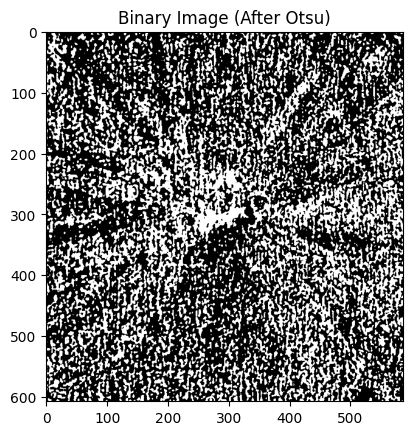

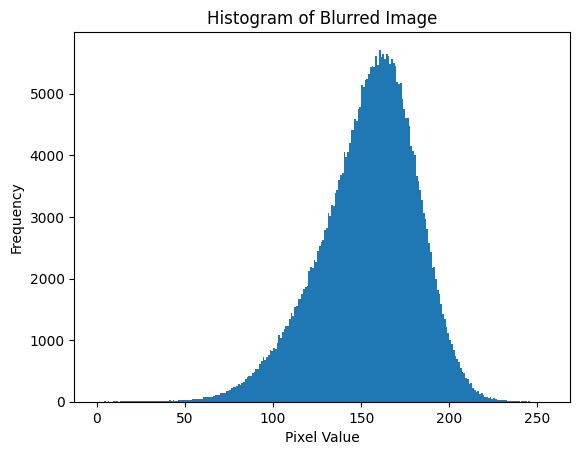

총 이미지 면적: 356896 pixels
편석 영역 면적: 106486.5 pixels
편석률: 29.84%


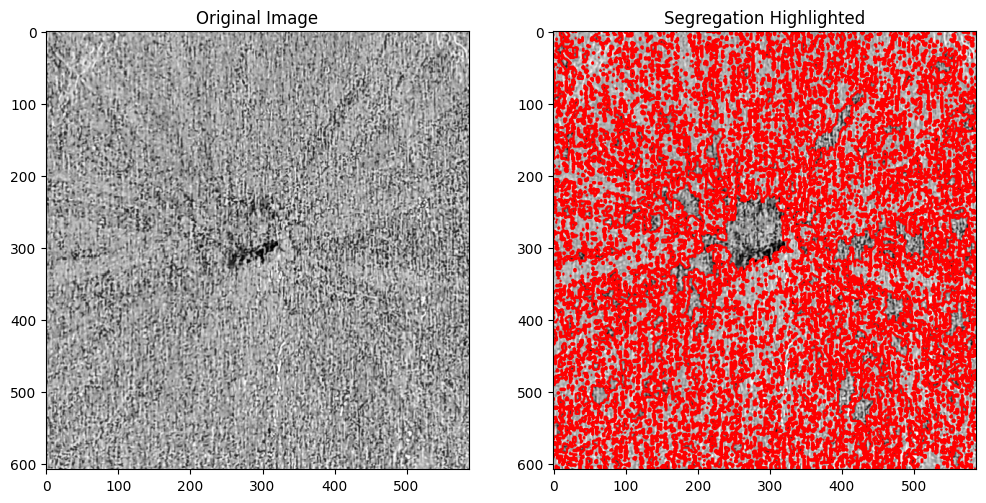

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. 이미지 읽기
#image_path = r"C:\temp\longi1.jpg"  # 분석할 빌렛 단면 마크로 이미지 경로
#image_path = r"C:\temp\longi2.jpg"  # 분석할 빌렛 단면 마크로 이미지 경로
#image_path = r"C:\temp\longi3.jpg"  # 분석할 빌렛 단면 마크로 이미지 경로
#image_path = r"C:\temp\longi4.jpg"  # 분석할 빌렛 단면 마크로 이미지 경로
#image_path = r"C:\temp\t1.jpg"  # 분석할 빌렛 단면 마크로 이미지 경로
image_path = r"C:\temp\t2.jpg"  # 분석할 빌렛 단면 마크로 이미지 경로

# 이미지 경로 확인
if not os.path.exists(image_path):
    print("Error: The file does not exist at the specified path.")
else:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 이미지가 비어있는 경우 처리
    if image is None:
        print("Error: Image could not be loaded. Please check the file path or format.")
    else:
        # 2. 이미지 전처리
        # 블러링으로 노이즈 제거
        blurred = cv2.GaussianBlur(image, (5, 5), 0)

        # 이진화 처리 (Otsu's Method)
        _, binary_image = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        print(f"자동 선택된 임계값: {_}")

        # 이진화 결과 확인
        plt.imshow(binary_image, cmap="gray")
        plt.title("Binary Image (After Otsu)")
        plt.show()

        # 히스토그램 확인 (추가)
        plt.hist(blurred.ravel(), bins=256, range=(0, 256))
        plt.title("Histogram of Blurred Image")
        plt.xlabel("Pixel Value")
        plt.ylabel("Frequency")
        plt.show()

        # 이진화 처리 (Thresholding)
        #_, binary_image = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY_INV)  # 편석은 어두운 영역이라고 가정(위 코드가 업그레이드 코드)


        # 3. 편석 영역 추출
        # 외곽선(Contours) 검출
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # 편석 영역이 없는 경우 처리
        if not contours:
            print("No segregation regions detected in the image.")
        else:
            # 4. 면적 계산
            # 이미지 전체 면적
            total_area = image.shape[0] * image.shape[1]

            # 편석 영역 면적 합산
            segregated_area = sum(cv2.contourArea(cnt) for cnt in contours)

            # 편석률 계산
            segregation_ratio = (segregated_area / total_area) * 100

            # 5. 결과 출력
            print(f"총 이미지 면적: {total_area} pixels")
            print(f"편석 영역 면적: {segregated_area} pixels")
            print(f"편석률: {segregation_ratio:.2f}%")

            # 6. 시각화
            # 원본 이미지에 편석 영역 표시
            result_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
            cv2.drawContours(result_image, contours, -1, (0, 0, 255), 2)  # 빨간색으로 편석 영역 표시

            # 이미지 출력
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.title("Original Image")
            plt.imshow(image, cmap='gray')

            plt.subplot(1, 2, 2)
            plt.title("Segregation Highlighted")
            plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
            plt.show()
